Download the dataset for the Cats vs Dogs from the microsoft.com below link i am using along with the command to download the dataset.

In [1]:
!wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip

--2022-06-06 13:34:25--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.37.232.111, 2600:141b:f000:c08a::e59, 2600:141b:f000:c09f::e59
Connecting to download.microsoft.com (download.microsoft.com)|23.37.232.111|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘kagglecatsanddogs_5340.zip’

kagglecatsanddogs_5 100%[===================>] 786.67M   108MB/s    in 7.9s    

2022-06-06 13:34:33 (100 MB/s) - ‘kagglecatsanddogs_5340.zip’ saved [824887076/824887076]



Unzip the downloaded the using the below command

In [4]:
!unzip kagglecatsanddogs_5340.zip

Streaming output truncated to the last 5000 lines.
  inflating: PetImages/Dog/5500.jpg  
  inflating: PetImages/Dog/5501.jpg  
  inflating: PetImages/Dog/5502.jpg  
  inflating: PetImages/Dog/5503.jpg  
  inflating: PetImages/Dog/5504.jpg  
  inflating: PetImages/Dog/5505.jpg  
  inflating: PetImages/Dog/5506.jpg  
  inflating: PetImages/Dog/5507.jpg  
  inflating: PetImages/Dog/5508.jpg  
  inflating: PetImages/Dog/5509.jpg  
  inflating: PetImages/Dog/551.jpg   
  inflating: PetImages/Dog/5510.jpg  
  inflating: PetImages/Dog/5511.jpg  
  inflating: PetImages/Dog/5512.jpg  
  inflating: PetImages/Dog/5513.jpg  
  inflating: PetImages/Dog/5514.jpg  
  inflating: PetImages/Dog/5515.jpg  
  inflating: PetImages/Dog/5516.jpg  
  inflating: PetImages/Dog/5517.jpg  
  inflating: PetImages/Dog/5518.jpg  
  inflating: PetImages/Dog/5519.jpg  
  inflating: PetImages/Dog/552.jpg   
  inflating: PetImages/Dog/5520.jpg  
  inflating: PetImages/Dog/5521.jpg  
  inflating: PetImages/Dog/5522.jpg  

Import the all module or libraries which required to perform Classification on Dogs and Cats dataset

In [5]:
import pandas as pd
import numpy as np
import os
import warnings
import random
from keras.preprocessing.image import load_img
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

**Creating the dataframe for the input and output**

*Creating the two paths i.e input_path and label where input_path stored the PetImages folder and label stored the the 1 for Dog and 0 for Cat*

In [6]:
input_path = []
label = []

for folder_name in os.listdir("PetImages"):
    for folder_path in os.listdir("PetImages/"+folder_name):
        if folder_name == 'Cat':
            label.append('00')
        else:
            label.append('11')
        input_path.append(os.path.join("PetImages", folder_name, folder_path))
#print the data to check if the path working fine
print(input_path[0], label[0])

PetImages/Cat/3451.jpg 00


Creating dataframe from the dataset where we have two fields(columns) i.e. image and label to identify Dogs as 1 and Cats as 0

In [7]:
df = pd.DataFrame()
df['images'] = input_path
df['label'] = label
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,images,label
0,PetImages/Dog/2509.jpg,11
1,PetImages/Dog/10667.jpg,11
2,PetImages/Cat/1784.jpg,00
3,PetImages/Cat/2863.jpg,00
4,PetImages/Dog/789.jpg,11


To avoid error, we must eliminate any files in the data set that are not image data.

In [8]:
#Search the file which is not image
for i in df['images']:
    if '.jpg' not in i:
        print(i)

PetImages/Dog/Thumbs.db
PetImages/Cat/Thumbs.db


In [9]:
import PIL
l = []
for image in df['images']:
    try:
        img = PIL.Image.open(image)
    except:
        l.append(image)
l

['PetImages/Dog/11702.jpg',
 'PetImages/Dog/Thumbs.db',
 'PetImages/Cat/Thumbs.db',
 'PetImages/Cat/666.jpg']

In [10]:
df = df[df['images']!='PetImages/Dog/Thumbs.db']
df = df[df['images']!='PetImages/Cat/Thumbs.db']
df = df[df['images']!='PetImages/Cat/666.jpg']
df = df[df['images']!='PetImages/Dog/11702.jpg']
len(df)

24998

Displaying the first 16 images sample of dataset for the Cats and Dogs in grid

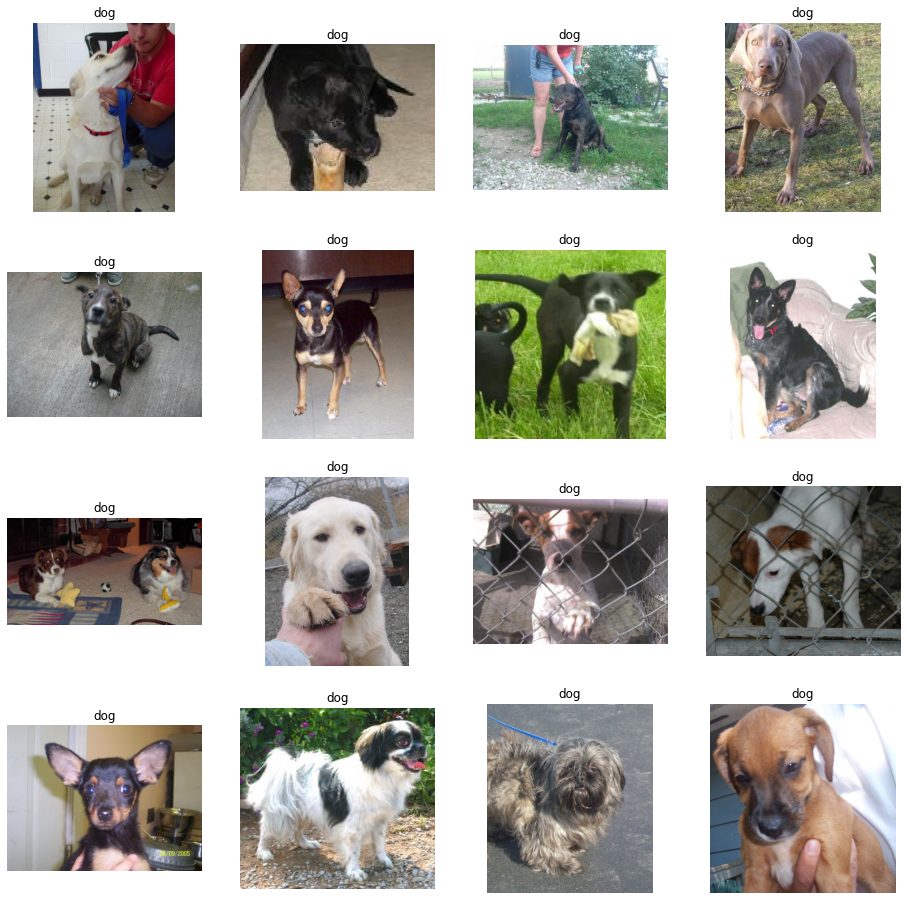

In [14]:
# to display grid of images for dogs
plt.figure(figsize=(16,16))
temp = df[df['label']=='11']['images']
start = random.randint(0, len(temp))
files = temp[start:start+16]

for index, file in enumerate(files):
    plt.subplot(4,4, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title('dog')
    plt.axis('off')

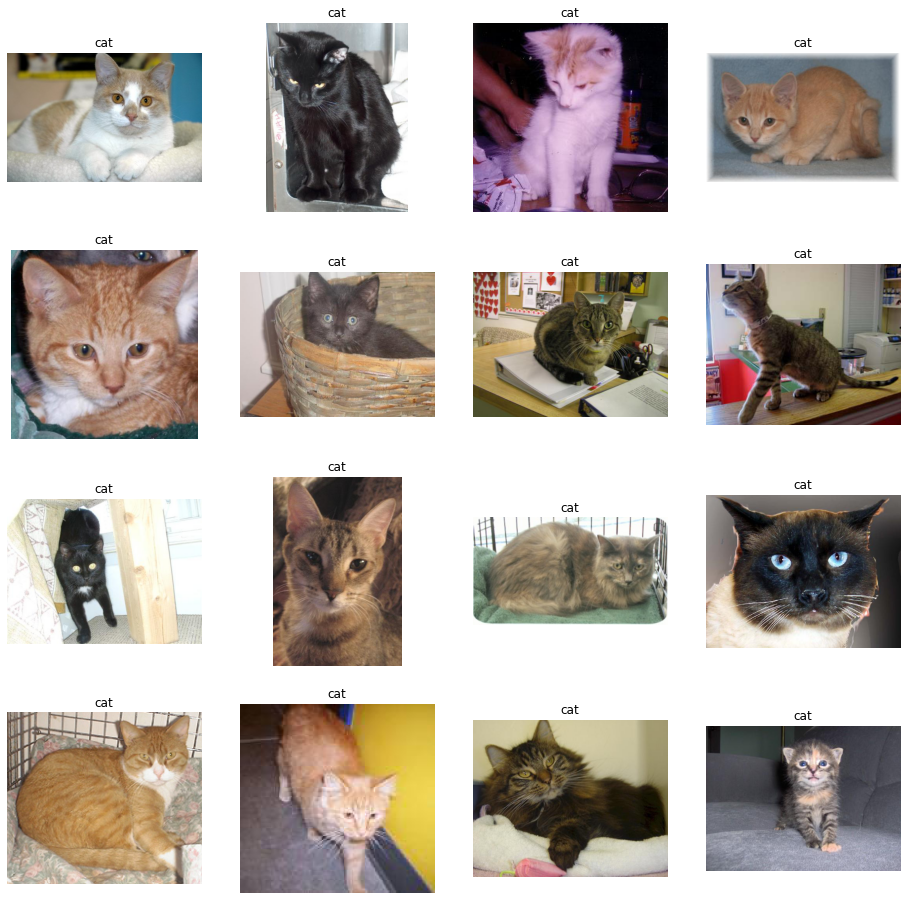

In [15]:
# to display grid of images for cats
plt.figure(figsize=(16,16))
temp = df[df['label']=='00']['images']
start = random.randint(0, len(temp))
files = temp[start:start+16]

for index, file in enumerate(files):
    plt.subplot(4,4, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title('cat')
    plt.axis('off')

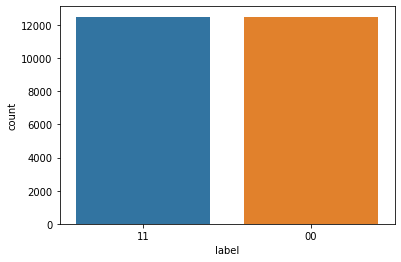

In [16]:
import seaborn as sb
sb.countplot(df['label'])

In [17]:
df['label'] = df['label'].astype('str')
df.head()

,images,label
0,PetImages/Dog/2509.jpg,11
1,PetImages/Dog/10667.jpg,11
2,PetImages/Cat/1784.jpg,00
3,PetImages/Cat/2863.jpg,00
4,PetImages/Dog/789.jpg,11


Creating the datagenerator for the dog and cat images

In [18]:
# splitting the input data
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [19]:
from keras.preprocessing.image import ImageDataGenerator
training_generator = ImageDataGenerator(
    rescale = 1./255,  # normalization of images
    rotation_range = 40, # augmention of images to avoid overfitting
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

validation_generator = ImageDataGenerator(rescale = 1./255)

training_iterator = training_generator.flow_from_dataframe(
    train, 
    x_col='images', 
    y_col='label', 
    target_size=(155,155), 
    batch_size=512, 
    class_mode='binary'
)

validation_iterator = validation_generator.flow_from_dataframe(
    test, 
    x_col='images', 
    y_col='label', 
    target_size=(155,155), 
    batch_size=512, 
    class_mode='binary'
)

Found 19998 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


Creating the model for the dataset

In [20]:
from keras import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model = Sequential([
                    Conv2D(16, (3,3), activation='relu', input_shape=(155,155,3)),
                    MaxPool2D((2,2)),
                    Conv2D(32, (3,3), activation='relu'),
                    MaxPool2D((2,2)),
                    Conv2D(64, (3,3), activation='relu'),
                    MaxPool2D((2,2)),
                    Flatten(),
                    Dense(512, activation='relu'),
                    Dense(1, activation='sigmoid')
])

In [21]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 153, 153, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 76, 76, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 74, 74, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 35, 35, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [22]:
prediction = model.fit(training_iterator, epochs=5, validation_data=validation_iterator)

Epoch 1/5
40/40 [==============================] - 168s 4s/step - loss: 0.8440 - accuracy: 0.5096 - val_loss: 0.6825 - val_accuracy: 0.6204
Epoch 2/5
40/40 [==============================] - 177s 4s/step - loss: 0.6508 - accuracy: 0.6222 - val_loss: 0.6030 - val_accuracy: 0.6684
Epoch 3/5
40/40 [==============================] - 155s 4s/step - loss: 0.6028 - accuracy: 0.6760 - val_loss: 0.5579 - val_accuracy: 0.7154
Epoch 4/5
40/40 [==============================] - 152s 4s/step - loss: 0.5689 - accuracy: 0.7052 - val_loss: 0.5398 - val_accuracy: 0.7272
Epoch 5/5
40/40 [==============================] - 165s 4s/step - loss: 0.5451 - accuracy: 0.7232 - val_loss: 0.5020 - val_accuracy: 0.7520


**Result Visualization**

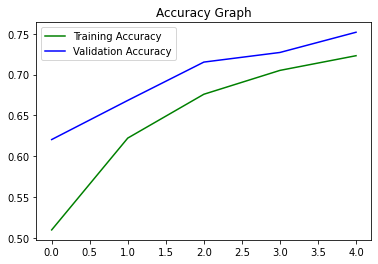

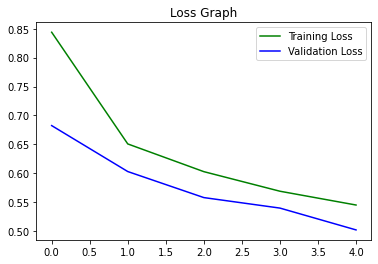

In [24]:
accuracy = prediction.history['accuracy']
val_accuracy = prediction.history['val_accuracy']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'g', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = prediction.history['loss']
val_loss = prediction.history['val_loss']
plt.plot(epochs, loss, 'g', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()